In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        f = (os.path.join(dirname, filename))
        print(f)
        
        with zipfile.ZipFile(f, 'r') as zip_ref:
            zip_ref.extractall()


In [2]:
data_train = pd.read_csv('./train_users_2.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
data_test = pd.read_csv('./test_users.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
countries = pd.read_csv('./countries.csv')
data_train.head()

FileNotFoundError: ignored

In [ ]:
data_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaT,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [ ]:
data_test['first_affiliate_tracked'].value_counts()

untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
Name: first_affiliate_tracked, dtype: int64

In [ ]:
data_train.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


In [ ]:
countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [ ]:
test_ids = data_test['id']
Nrows_train = data_train.shape[0]  


labels = data_train['country_destination'].values
data_train1 = data_train.drop(['country_destination'], axis=1)


data_all = pd.concat((data_train1, data_test), axis = 0, ignore_index = True)


data_all = data_all.drop(['id','date_first_booking'], axis=1)

In [ ]:
data_all.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [ ]:
data_all.isnull().sum()

date_account_created            0
timestamp_first_active          0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
dtype: int64

In [ ]:
data_all.gender.replace('-unknown-', np.nan, inplace=True)
data_all.first_browser.replace('-unknown-', np.nan, inplace=True)

In [ ]:
data_all.loc[data_all.age > 100, 'age'] = np.nan
data_all.loc[data_all.age < 18, 'age'] = np.nan

In [ ]:

data_all['dac_year'] = data_all.date_account_created.dt.year
data_all['dac_month'] = data_all.date_account_created.dt.month
data_all['dac_day'] = data_all.date_account_created.dt.day


data_all['tfa_year'] = data_all.timestamp_first_active.dt.year
data_all['tfa_month'] = data_all.timestamp_first_active.dt.month
data_all['tfa_day'] = data_all.timestamp_first_active.dt.day

data_all.drop('date_account_created',1, inplace=True)
data_all.drop('timestamp_first_active',1, inplace=True)

data_all.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1052\2364113966.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_all.drop('date_account_created',1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1052\2364113966.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_all.drop('timestamp_first_active',1, inplace=True)


,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31
4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8


In [ ]:
data_all.describe()

,age,signup_flow,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
count,155803.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000
mean,36.071186,4.291965,2013.243828,6.457505,15.958969,2013.243341,6.457446,15.958845
std,11.654972,8.794313,0.921206,2.985339,8.757489,0.921756,2.985189,8.757084
min,18.000000,0.000000,2010.000000,1.000000,1.000000,2009.000000,1.000000,1.000000
25%,28.000000,0.000000,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000
50%,33.000000,0.000000,2014.000000,7.000000,16.000000,2014.000000,7.000000,16.000000
75%,42.000000,1.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000
max,100.000000,25.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000


In [ ]:
data_all.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
FEMALE,18.0,100.0,35.742783,70738
MALE,18.0,100.0,36.293932,63399
OTHER,18.0,78.0,35.945455,275


<AxesSubplot:xlabel='gender'>

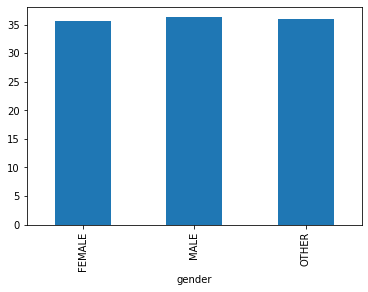

In [ ]:
data_all.groupby('gender').age.mean().plot(kind='bar')

<AxesSubplot:>

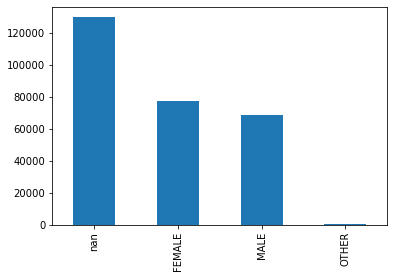

In [ ]:
data_all.gender.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:title={'center':'Number of User Accounts Created in a Year'}>

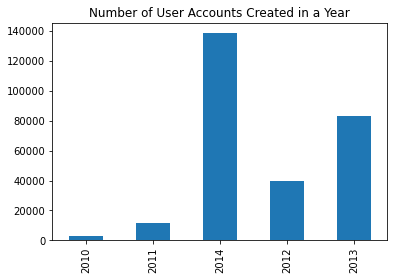

In [ ]:
data_all.dac_year.value_counts(sort=False).plot(kind='bar', title='Number of User Accounts Created in a Year')

<AxesSubplot:title={'center':'Number of Users by First Active Year'}>

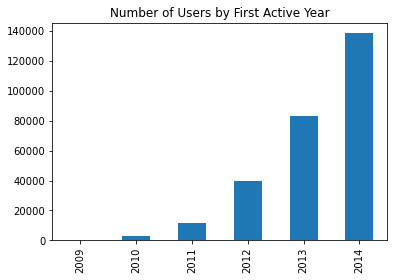

In [ ]:
data_all.tfa_year.value_counts(sort=False).plot(kind='bar', title = 'Number of Users by First Active Year')

<AxesSubplot:title={'center':'Countries Visited by AirBNB Users'}>

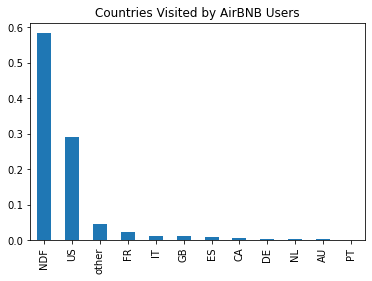

In [ ]:
data_train.country_destination.value_counts(normalize=True).plot(kind='bar',title='Countries Visited by AirBNB Users')

In [ ]:
data_all.language.value_counts(sort=True)

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
pl               75
da               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

In [ ]:
data_all.isnull().sum()

gender                     129480
age                        119744
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
dac_year                        0
dac_month                       0
dac_day                         0
tfa_year                        0
tfa_month                       0
tfa_day                         0
dtype: int64

In [ ]:

features = ['gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider',\
            'first_affiliate_tracked','signup_app','first_device_type','first_browser']


data_all = pd.get_dummies(data_all,columns=features)

In [ ]:
data_all.describe()

,age,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,gender_OTHER,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
count,155803.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,...,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000
mean,36.071186,2013.243828,6.457505,15.958969,2013.243341,6.457446,15.958845,0.281346,0.247540,0.001212,...,0.000624,0.000098,0.000007,0.000156,0.000004,0.000029,0.000007,0.000004,0.000051,0.000025
std,11.654972,0.921206,2.985339,8.757489,0.921756,2.985189,8.757084,0.449657,0.431584,0.034795,...,0.024976,0.009898,0.002694,0.012491,0.001905,0.005388,0.002694,0.001905,0.007128,0.005040
min,18.000000,2010.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,2014.000000,7.000000,16.000000,2014.000000,7.000000,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_all.head()

,age,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,gender_OTHER,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,NaN,2010,6,28,2009,3,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,2011,5,25,2009,5,23,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,2010,9,28,2009,6,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,2011,12,5,2009,10,31,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.0,2010,9,14,2009,12,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

V = data_all.values
X_train = V[:Nrows_train]
X_test = V[Nrows_train:]


labler = LabelEncoder()
y = labler.fit_transform(labels)


xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=22, objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(X_train, y)
y_pred = xgb.predict_proba(X_test)

In [ ]:
print(xg.score(X_train, y_train))

In [ ]:

ids = []  
cts = [] 
for i in range(len(test_ids)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += labler.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()


sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('submission.csv',index=False)

<AxesSubplot:title={'center':'Feature importance'}, ylabel='Features'>

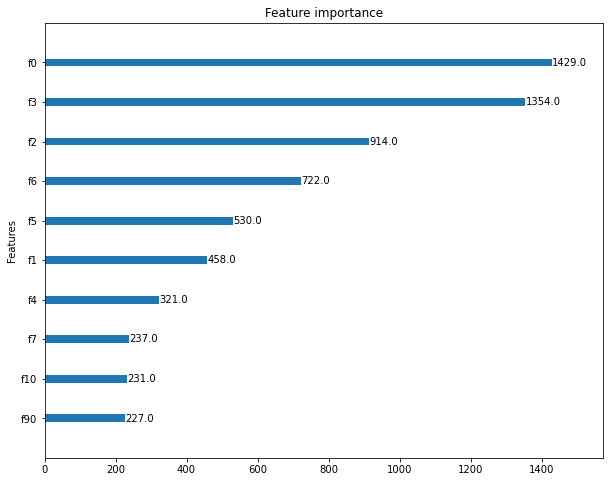

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(1,1,figsize=(10,8))

plot_importance(xgb, ax=ax, xlabel='' ,max_num_features=10,grid=False)